In [1]:
## Visualisation for Multivariate Linear Regression Model (BTC/ETH)
## by Jimmy Cheung

In [2]:
## No need to carry out multiple (30) experiments and calculate RMSE, MAE, MAPE here

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import matplotlib.ticker as ticker
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
# Multivariate data processing
def split_data(data, input_size, output_size, train_ratio, seed):
	# 1. split data into input features (X) and output (y)
	X, y = [], []
	total_size = input_size + output_size
	for i in range(len(data) - total_size + 1):
		X.append(features[i:i+input_size])
		y.append(target[i+input_size:i+total_size])
	# 2. shuffle batches and split into train/test
	X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_ratio, random_state = seed)
	return X_train, X_test, y_train, y_test

In [5]:
# DATA HANDLING - CHANGE DATA AS DESIRED

# data = 'bitcoin'
data = 'ethereum'

if data == 'bitcoin':
    df = pd.read_csv('../data/bitcoin.csv')
else:
    df = pd.read_csv('../data/ethereum.csv')
df = df.drop(columns = ['Adj Close'])
features = df[['High', 'Low', 'Open', 'Close', 'Volume']]
features = MinMaxScaler().fit_transform(features) # normalise input
target = df['Close']
target_reshaped = np.array(target).reshape(-1,1) # normalise output
scaler = MinMaxScaler(feature_range=(0,1)) 
target = scaler.fit_transform(target_reshaped).flatten()

In [6]:
# PARAMETERS - we are setting fixed values here (same values as our paper)
input_size = 6
output_size = 5
train_ratio = 0.7
seed = 5925

In [7]:
X_train, X_test, y_train, y_test = split_data(df, input_size, output_size, train_ratio, seed)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# LINEAR REGRESSSION
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) # shape = (597, 5)
y_pred = np.array(y_pred)
y_test = np.array(y_test)

# inverse transform (get back to original scale)
pred_vals = scaler.inverse_transform(y_pred) # shape = (597, 5)
act_vals = scaler.inverse_transform(y_test) # shape = (597, 5)

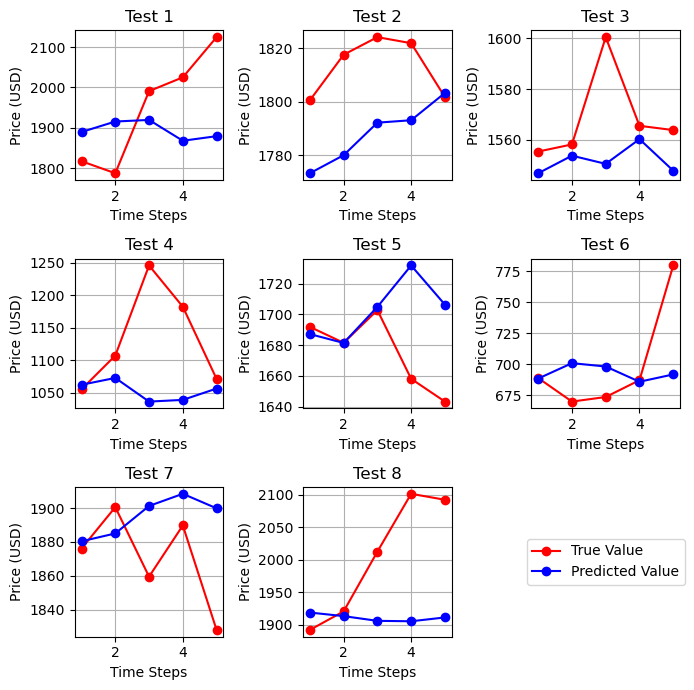

In [8]:
time_steps = list(range(1, output_size + 1))

fig, axs = plt.subplots(3, 3, figsize=(7, 7))  # Adjusted figure size for better spacing
axs = axs.flatten()
for i in range(8):  # Only plot the first 8 graphs
    ax = axs[i]
    ax.plot(time_steps, act_vals[i], marker='o', linestyle='-', color='red', label='True Value')
    ax.plot(time_steps, pred_vals[i], marker='o', linestyle='-', color='blue', label='Predicted Value')
    ax.set_title(f'Test {i+1}')
    ax.set_xlabel('Time Steps')
    ax.set_ylabel('Price (USD)')
    ax.grid(True)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2))  
    
# Remove the 9th subplot
fig.delaxes(axs[8])
# Add legend in the 9th subplot's space
axs[8] = fig.add_subplot(3, 3, 9)
axs[8].axis('off')  # Hide the axes for the legend subplot
axs[8].legend(handles=[axs[0].lines[0], axs[0].lines[1]], loc='center')  # Center the legend

# Adjust layout
plt.tight_layout()

if data == 'bitcoin':
    # very similar results to BTC-U-Linear.png, but there are differences (e.g. see Horizon 8)
    plt.savefig('results/linear/multivariate/BTC-M-Linear.png')
else: 
    plt.savefig('results/linear/multivariate/ETH-M-Linear.png')

plt.show()
plt.close()